# Multiple Linear Regression in Detail

## Overview of Multiple Linear Regression
Multiple Linear Regression is an extension of Simple Linear Regression, where the relationship between the dependent variable (Y) and multiple independent variables (X1, X2, ..., Xn) is modeled. Instead of fitting a line, we fit a hyperplane to the data points in higher-dimensional space.

### Objective:
To predict the value of the dependent variable (Y) based on several independent variables (X1, X2, ..., Xn).

### Formula for Multiple Linear Regression:

In multiple linear regression, the relationship between the dependent variable `Y` and the independent variables `X1, X2, ..., Xn` is modeled as:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon $$

Where:
- `Y` = dependent variable (output or target)
- `X1, X2, ..., Xn` = independent variables (inputs or predictors)
- `\beta_0` = intercept (the value of `Y` when all `X` values are 0)
- `\beta_1, \beta_2, ..., \beta_n` = coefficients (slopes) corresponding to each independent variable, indicating the change in `Y` for a one-unit change in each corresponding `X`
- `\epsilon` = error term (captures the difference between the predicted and actual values)

### Assumptions of Multiple Linear Regression:
1. **Linearity**: The relationship between the dependent and independent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The variance of errors is constant across all levels of the independent variables.
4. **Normality of Errors**: The errors should follow a normal distribution.
5. **No Multicollinearity**: The independent variables should not be highly correlated with each other.

## Steps to Perform Multiple Linear Regression
1. **Collect Data**: Gather data for both the dependent variable (Y) and independent variables (X1, X2, ..., Xn).
2. **Fit the Model**: Use the training data to find the coefficients (`β0, β1, ..., βn`) of the multiple linear model.
3. **Make Predictions**: Use the fitted model to predict values of the dependent variable for new independent variable values.
4. **Evaluate the Model**: Assess the accuracy of the model using metrics like R², Mean Squared Error (MSE), Adjusted R², etc.
5. **Visualize the Results**: Plot the data and fitted hyperplane (if possible) or at least the relationship between the most important independent variables and the dependent variable.

## Example and Python Code
Let's dive into the code implementation of **multiple linear regression** using Python and **scikit-learn**. We will use synthetic data with multiple independent variables.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


### Generating Example Data for Multiple Linear Regression
We will generate some synthetic data for this example, where the dependent variable `Y` depends on two independent variables `X1` and `X2`.


In [2]:
# Generate synthetic data for X1, X2, and Y
np.random.seed(0)  # For reproducibility
X1 = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10 for X1
X2 = np.random.rand(100, 1) * 5   # 100 data points between 0 and 5 for X2
Y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 5  # Y = 3*X1 + 2*X2 + noise


### Splitting Data into Training and Testing
We’ll split the dataset into a training set (80%) and a test set (20%) to evaluate the model's performance.


In [3]:
# Combine X1 and X2 into a single feature matrix X
X = np.hstack((X1, X2))

# Split data into training and test sets (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


### Feature Scaling (Optional but recommended)
Since the independent variables `X1` and `X2` are on different scales (e.g., `X1` ranges from 0-10, and `X2` ranges from 0-5), it is recommended to scale them to ensure the model is trained properly.
We will use `StandardScaler` to standardize the features.


In [4]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Fitting the Multiple Linear Regression Model
Now, we will fit a multiple linear regression model to the scaled training data.


In [5]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, Y_train)


LinearRegression()

### Making Predictions
After fitting the model, we can predict the values of `Y` using the scaled test data.


In [6]:
# Predict the values for the test set
Y_pred = model.predict(X_test_scaled)


### Evaluating the Model
Now, let's evaluate the model's performance using two common metrics:
- **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted values.
- **R² (R-squared)**: Measures how well the model explains the variance in the data (ranges from 0 to 1, where 1 means perfect fit).
- **Adjusted R²**: Adjusts R² for the number of predictors in the model to prevent overfitting.


In [7]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
# n = X_test_scaled.shape[0]  # Number of test samples
# p = X_test_scaled.shape[1]  # Number of predictors (features)
# adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 17.734614397777115
R-squared: 0.809508576577196


### Visualizing the Results
In the case of multiple linear regression, it is difficult to visualize the full hyperplane. However, we can plot the relationship between the dependent variable `Y` and the individual features (`X1` or `X2`) to get a sense of their contribution.


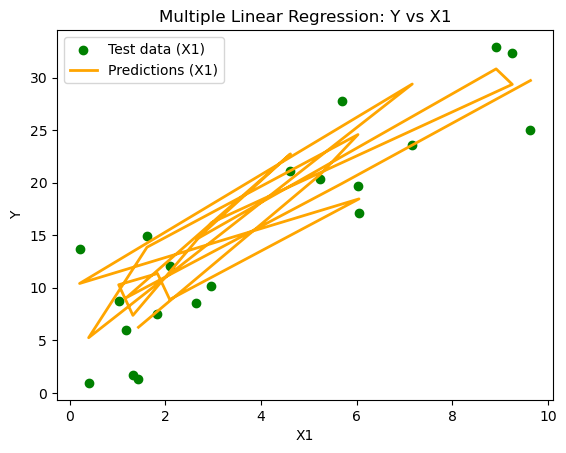

In [8]:
# Plot the relationship between Y and X1
plt.scatter(X_test[:, 0], Y_test, color='green', label='Test data (X1)')
plt.plot(X_test[:, 0], Y_pred, color='orange', linewidth=2, label='Predictions (X1)')

# Adding titles and labels
plt.title('Multiple Linear Regression: Y vs X1')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()

# Show plot
plt.show()


### Interpretation of Results
1. **Mean Squared Error (MSE)**: A lower MSE indicates that the model's predictions are close to the actual values.
2. **R-squared (R²)**: This metric shows how well the model explains the variance in the dependent variable. A value close to 1 means that the model is a good fit.
3. **Adjusted R²**: Unlike R², Adjusted R² takes into account the number of independent variables and adjusts for overfitting.

### Conclusion
In this lecture, we covered:
1. The theory behind multiple linear regression, including the formula, assumptions, and the effect of multiple predictors.
2. The steps for implementing multiple linear regression using Python and scikit-learn.
3. Code to generate data, train a model, make predictions, and evaluate it.
4. Visualization of the relationships between the dependent variable and the independent variables.

### Extensions:
- You can experiment with different scaling techniques, such as `MinMaxScaler` or `RobustScaler`.
- Explore advanced techniques like **Ridge** or **Lasso** regression to handle multicollinearity.


call libraries
import data
clean data
standardize data
split data (train , test)
fit transform model
calculate y pred
evaluate ypred and ytest


Ridge=(y-Y^)^2  +  λ  x (slope)^2 
​
(Least Absolute Shrinkage and Selection Operator)

lesso = (y-Y^) +  λ  x |slope|


Elastic Net



best fit line (diggerence in value) --> Ridge and lessoo  (feature selection, overfitting)  ---> Elastic net  